In [121]:
import stitching
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.7.0


# Загрузка изображений

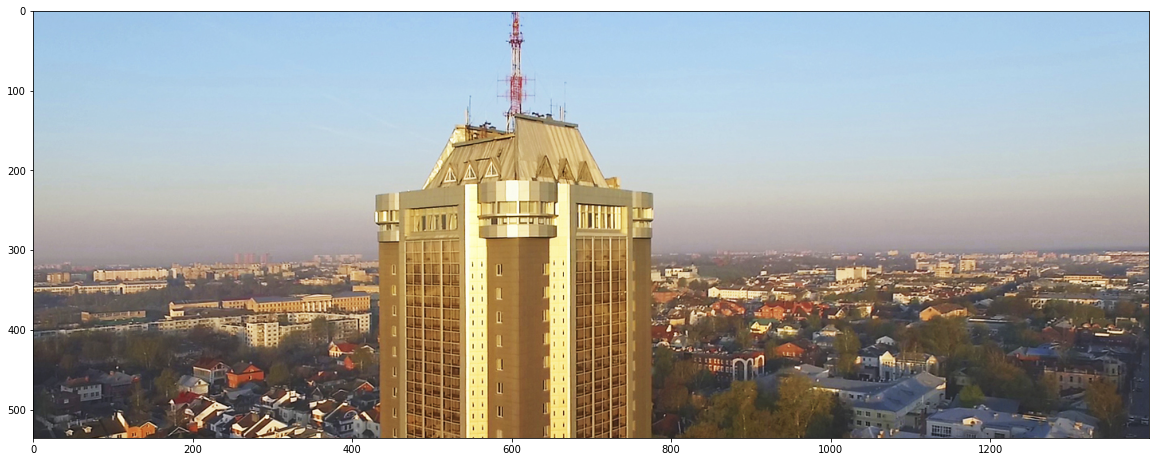

In [122]:
image = cv2.cvtColor(cv2.imread('original.jpg'), cv2.COLOR_BGR2RGB)
_, axes = plt.subplots(figsize=(20,20))
axes.imshow(image)

# Инициализация алгоритмов


In [123]:
sift_setup = {"detector": "sift", "confidence_threshold": 0.2}
orb_setup = {"detector": "orb", "confidence_threshold": 0.2}
orb_stitcher = stitching.Stitcher(**orb_setup)
sift_stitcher = stitching.Stitcher(**sift_setup)

# SIFT

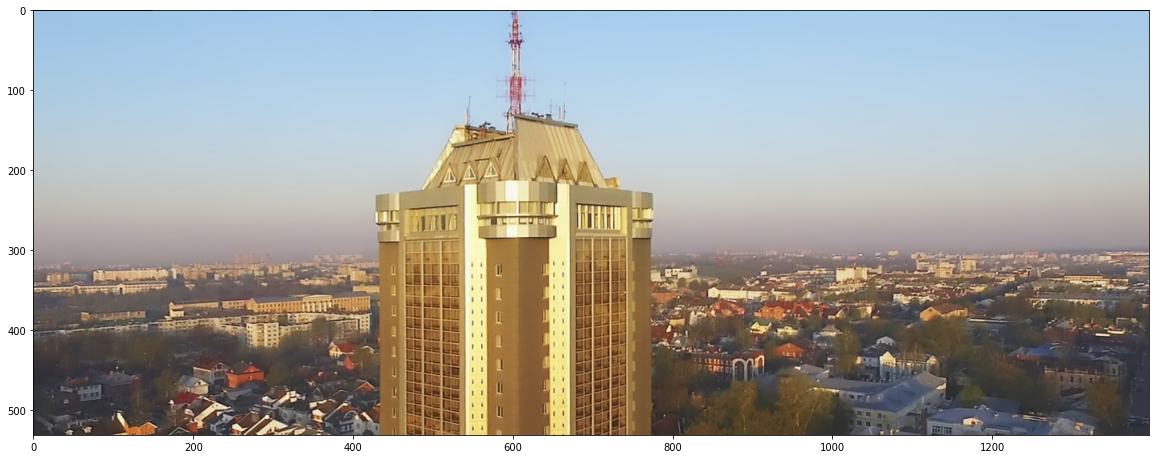

In [124]:
result_sift = cv2.cvtColor(sift_stitcher.stitch(['left.jpg', 'right.jpg']), cv2.COLOR_BGR2RGB)
_, axes = plt.subplots(figsize=(20,20))
axes.imshow(result_sift)

4.8 секунд = детекция и склейка

# ORB

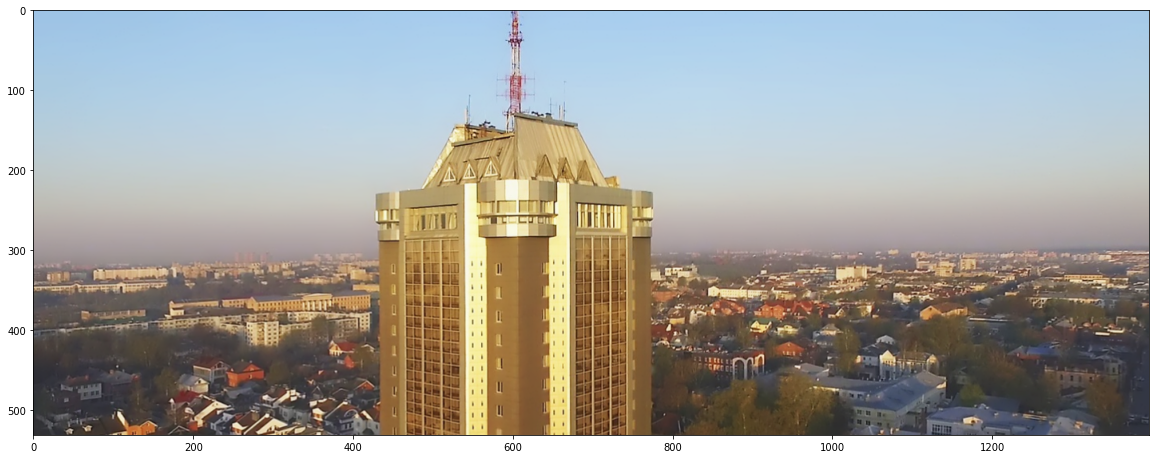

In [125]:
result_orb = cv2.cvtColor(orb_stitcher.stitch(['left.jpg', 'right.jpg']), cv2.COLOR_BGR2RGB)
_, axes = plt.subplots(figsize=(20,20))
axes.imshow(result_orb)

1 секунда - детекция и склейка

In [126]:
star = cv2.xfeatures2d.StarDetector_create()
kp = star.detect(cv2.cvtColor(cv2.imread('original.jpg'), cv2.COLOR_BGR2GRAY),None)
BRIEF = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# left
kp_1, des_1 = BRIEF.compute(cv2.cvtColor(cv2.imread('left.jpg'), cv2.COLOR_BGR2GRAY), kp)
# right
kp_2, des_2 = BRIEF.compute(cv2.cvtColor(cv2.imread('right.jpg'), cv2.COLOR_BGR2GRAY), kp)
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING)
# совпадающие точки
matches = bf.knnMatch(des_1, des_2,k=2)
# фильтрация точек
good = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good.append(m)
print(len(good))
        

8


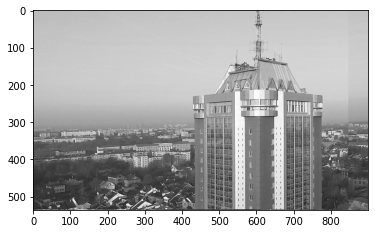

In [137]:
MIN_MATCH_COUNT = 7
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp_1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ kp_2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    dst = cv2.warpPerspective(cv2.cvtColor(cv2.imread('left.jpg'), cv2.COLOR_BGR2GRAY), M, ((cv2.cvtColor(cv2.imread('left.jpg'), cv2.COLOR_BGR2GRAY).shape[1] + cv2.cvtColor(cv2.imread('right.jpg'), cv2.COLOR_BGR2GRAY).shape[1]), cv2.cvtColor(cv2.imread('right.jpg'), cv2.COLOR_BGR2GRAY).shape[0])) 
    dst[0:cv2.cvtColor(cv2.imread('right.jpg'), cv2.COLOR_BGR2GRAY).shape[0], 0:cv2.cvtColor(cv2.imread('right.jpg'), cv2.COLOR_BGR2GRAY).shape[1]] = cv2.cvtColor(cv2.imread('right.jpg'), cv2.COLOR_BGR2GRAY)
    dst[0:cv2.cvtColor(cv2.imread('left.jpg'), cv2.COLOR_BGR2GRAY).shape[0], 0:cv2.cvtColor(cv2.imread('left.jpg'), cv2.COLOR_BGR2GRAY).shape[1]] = cv2.cvtColor(cv2.imread('left.jpg'), cv2.COLOR_BGR2GRAY)
    dst = dst[:, :900]
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB))
